<a href="https://colab.research.google.com/github/norayehia/cnnvsmobilenet-cifartuning/blob/main/2cnncifar3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

https://medium.com/@beingfarina/breaking-down-the-mathematics-behind-cnn-models-a-comprehensive-guide-1853aa6b011e

In [ ]:
from keras import layers
from keras import models

# Define a sequential model
model = models.Sequential()

# Add the first convolutional layer with 32 filters of size 3x3, applying a relu activation function
model.add(layers.Conv2D (32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add a second convolutional layer with 64 filters of size 3x3, applying a relu activation function
model.add(layers.Conv2D (64, (3, 3), activation='relu'))

# Add another max pooling layer with a pool size of 2x2
model.add(layers. MaxPooling2D((2, 2)))

# Add a third convolutional layer with 64 filters of size 3x3, applying a relu activation function
model.add(layers.Conv2D (64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers into a 1D array
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 64 neurons and a relu activation function
model.add(layers.Dense (64, activation='relu'))

# Add a final fully connected (dense) layer with 10 output neurons (one for each digit in MNIST) and a softmax activation function
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile a model (the rest of the code is missing from the image)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the training images to a 4D tensor (60000 samples, 28x28 pixels, 1 color channel)
train_images = train_images.reshape((60000, 28, 28, 1))

# Normalize the training images by converting them to floats and dividing by 255
train_images = train_images.astype('float32') / 255

# Reshape the test images to a 4D tensor (10000 samples, 28x28 pixels, 1 color channel)
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize the test images by converting them to floats and dividing by 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels (convert them to vectors with a 1 at the index of the digit)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)





11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
# Train the model on the training data for 5 epochs with a batch size of 64
history= model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 70s 71ms/step - loss: 0.1840 - accuracy: 0.9409
Epoch 2/3
938/938 [==============================] - 51s 54ms/step - loss: 0.0468 - accuracy: 0.9855
Epoch 3/3
938/938 [==============================] - 51s 54ms/step - loss: 0.0326 - accuracy: 0.9901


In [ ]:
import matplotlib.pyplot as plt

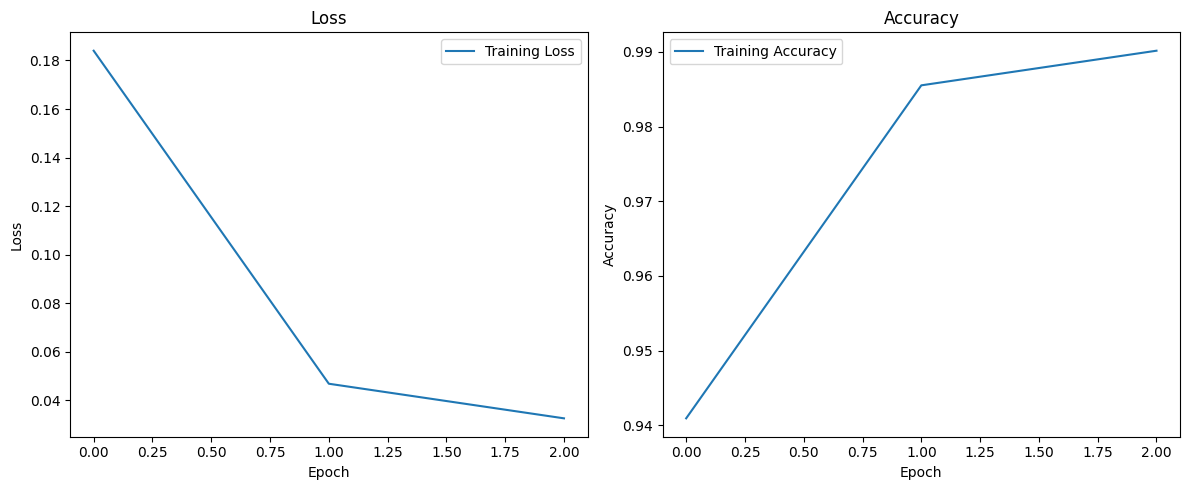

In [ ]:
# Plot the training curves
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 4s 12ms/step
Confusion Matrix:
[[ 974    1    0    0    0    0    2    1    0    2]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   2    2 1021    0    1    0    1    2    3    0]
 [   1    0    1 1003    0    3    0    0    2    0]
 [   0    1    0    0  976    0    5    0    0    0]
 [   2    0    0    4    0  881    1    1    1    2]
 [   2    2    0    0    0    6  948    0    0    0]
 [   0    3    8    1    1    0    0 1012    1    2]
 [   4    1    1    1    0    2    0    0  963    2]
 [   3    2    1    0    7    5    0    1    2  988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98   

Confusion Matrix:
[[ 974    1    0    0    0    0    2    1    0    2]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   2    2 1021    0    1    0    1    2    3    0]
 [   1    0    1 1003    0    3    0    0    2    0]
 [   0    1    0    0  976    0    5    0    0    0]
 [   2    0    0    4    0  881    1    1    1    2]
 [   2    2    0    0    0    6  948    0    0    0]
 [   0    3    8    1    1    0    0 1012    1    2]
 [   4    1    1    1    0    2    0    0  963    2]
 [   3    2    1    0    7    5    0    1    2  988]]


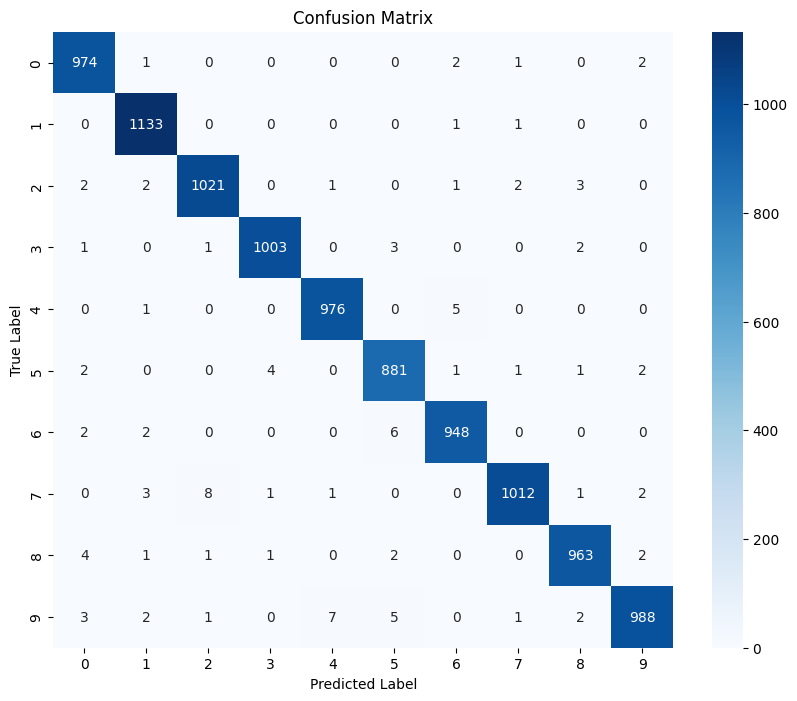


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

#With imgprocessing

In [ ]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Apply Gaussian filter to the training and test images
train_images_gaussian = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in train_images])
test_images_gaussian = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in test_images])

# Apply Laplacian filter to the training and test images
train_images_laplacian = np.array([cv2.Laplacian(img, cv2.CV_64F) for img in train_images])
test_images_laplacian = np.array([cv2.Laplacian(img, cv2.CV_64F) for img in test_images])

# Reshape the images to 4D tensors (samples, 28x28 pixels, 1 color channel)
train_images_gaussian = train_images_gaussian.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images_gaussian = test_images_gaussian.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_images_laplacian = train_images_laplacian.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images_laplacian = test_images_laplacian.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels (convert them to vectors with a 1 at the index of the digit)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Now you can use either the Gaussian or Laplacian preprocessed images for training your model
# For example, using the Gaussian filtered images:
train_images = train_images_gaussian
test_images = test_images_gaussian

# Or using the Laplacian filtered images:
# train_images = train_images_laplacian
# test_images = test_images_laplacian

# Continue with building and training your model as before


In [ ]:
# Train the model on the training data for 5 epochs with a batch size of 64
history= model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 79s 84ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 2/3
938/938 [==============================] - 51s 54ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 3/3
938/938 [==============================] - 53s 56ms/step - loss: 0.0209 - accuracy: 0.9936


In [ ]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 3s 9ms/step
Confusion Matrix:
[[ 977    1    0    0    0    0    1    0    0    1]
 [   0 1127    2    3    0    0    1    0    1    1]
 [   0    0 1024    1    1    0    0    4    2    0]
 [   0    0    1 1008    0    0    0    0    0    1]
 [   0    0    0    0  973    0    3    0    0    6]
 [   2    0    0   19    0  857    3    0    5    6]
 [   2    2    0    0    1    0  949    0    3    1]
 [   0    2   10    1    0    0    0  992    1   22]
 [   2    0    1    4    2    0    1    1  958    5]
 [   0    0    0    2    5    1    0    0    1 1000]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.96      0.98    

Confusion Matrix:
[[ 977    1    0    0    0    0    1    0    0    1]
 [   0 1127    2    3    0    0    1    0    1    1]
 [   0    0 1024    1    1    0    0    4    2    0]
 [   0    0    1 1008    0    0    0    0    0    1]
 [   0    0    0    0  973    0    3    0    0    6]
 [   2    0    0   19    0  857    3    0    5    6]
 [   2    2    0    0    1    0  949    0    3    1]
 [   0    2   10    1    0    0    0  992    1   22]
 [   2    0    1    4    2    0    1    1  958    5]
 [   0    0    0    2    5    1    0    0    1 1000]]


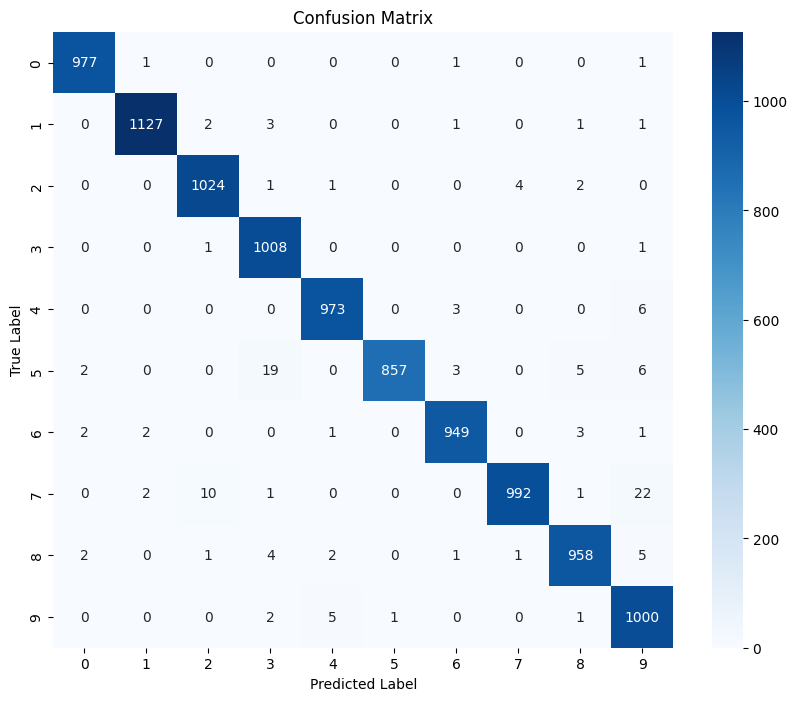


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.96      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

##TransferLearning with mobilenet on this data

In [ ]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Reshape
from keras.optimizers import Adam

In [ ]:

"""
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Apply Gaussian filter to the training and test images
train_images_gaussian = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in train_images])
test_images_gaussian = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in test_images])

# Reshape the images to 4D tensors (samples, 28x28 pixels, 1 color channel)
train_images_gaussian = train_images_gaussian.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images_gaussian = test_images_gaussian.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Adjust images to have 3 color channels
train_images_gaussian = np.repeat(train_images_gaussian, 3, axis=-1)
test_images_gaussian = np.repeat(test_images_gaussian, 3, axis=-1)

# Resize images to 224x224 as required by MobileNet
train_images_resized = np.array([cv2.resize(img, (224, 224)) for img in train_images_gaussian])
test_images_resized = np.array([cv2.resize(img, (224, 224)) for img in test_images_gaussian])"""




"""
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to 4D tensors (samples, 28x28 pixels, 1 color channel)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Adjust images to have 3 color channels
train_images = np.repeat(train_images, 3, axis=-1)
test_images = np.repeat(test_images, 3, axis=-1)

# Resize images to 224x224 as required by MobileNet
train_images_resized = np.array([cv2.resize(img, (224, 224)) for img in train_images])
test_images_resized = np.array([cv2.resize(img, (224, 224)) for img in test_images])

"""

In [1]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select a sample of the data (e.g., 10% of the training and test data)
sample_size = 6000  # 10% of 60000
train_sample_indices = np.random.choice(train_images.shape[0], sample_size, replace=False)
test_sample_size = 1000  # 10% of 10000
test_sample_indices = np.random.choice(test_images.shape[0], test_sample_size, replace=False)

train_images_sample = train_images[train_sample_indices]
train_labels_sample = train_labels[train_sample_indices]
test_images_sample = test_images[test_sample_indices]
test_labels_sample = test_labels[test_sample_indices]

# Reshape the images to 4D tensors (samples, 28x28 pixels, 1 color channel)
train_images_sample = train_images_sample.reshape((sample_size, 28, 28, 1)).astype('float32') / 255
test_images_sample = test_images_sample.reshape((test_sample_size, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels_sample = to_categorical(train_labels_sample)
test_labels_sample = to_categorical(test_labels_sample)

# Adjust images to have 3 color channels
train_images_sample = np.repeat(train_images_sample, 3, axis=-1)
test_images_sample = np.repeat(test_images_sample, 3, axis=-1)

# Resize images to 224x224 as required by MobileNet
train_images_resized_sample = np.array([cv2.resize(img, (224, 224)) for img in train_images_sample])
test_images_resized_sample = np.array([cv2.resize(img, (224, 224)) for img in test_images_sample])

In [2]:
# Load the pre-trained MobileNet model without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer with 10 classes (for the 10 digits)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:



# Train the model on the sample of data
history=model.fit(train_images_resized_sample, train_labels_sample, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
75/75 [==============================] - 275s 4s/step - loss: 0.4070 - accuracy: 0.8667 - val_loss: 0.1163 - val_accuracy: 0.9683
Epoch 2/3
75/75 [==============================] - 272s 4s/step - loss: 0.1147 - accuracy: 0.9640 - val_loss: 0.1021 - val_accuracy: 0.9692
Epoch 3/3
75/75 [==============================] - 279s 4s/step - loss: 0.0731 - accuracy: 0.9779 - val_loss: 0.1099 - val_accuracy: 0.9617


32/32 [==============================] - 40s 1s/step - loss: 0.0931 - accuracy: 0.9710
Test accuracy: 97.10%
32/32 [==============================] - 38s 1s/step
Confusion Matrix:
[[118   0   0   0   0   0   0   0   0   0]
 [  0 119   0   0   0   0   1   0   0   0]
 [  0   0  86   1   0   3   3   2   2   0]
 [  0   0   1 104   0   0   0   0   0   0]
 [  0   0   1   0 104   0   1   1   0   1]
 [  0   0   1   2   0  71   0   0   0   0]
 [  2   1   0   0   1   0  82   0   1   0]
 [  0   0   0   0   0   0   0  95   0   1]
 [  0   0   0   0   0   0   0   0  84   0]
 [  1   0   0   0   0   0   0   0   2 108]]


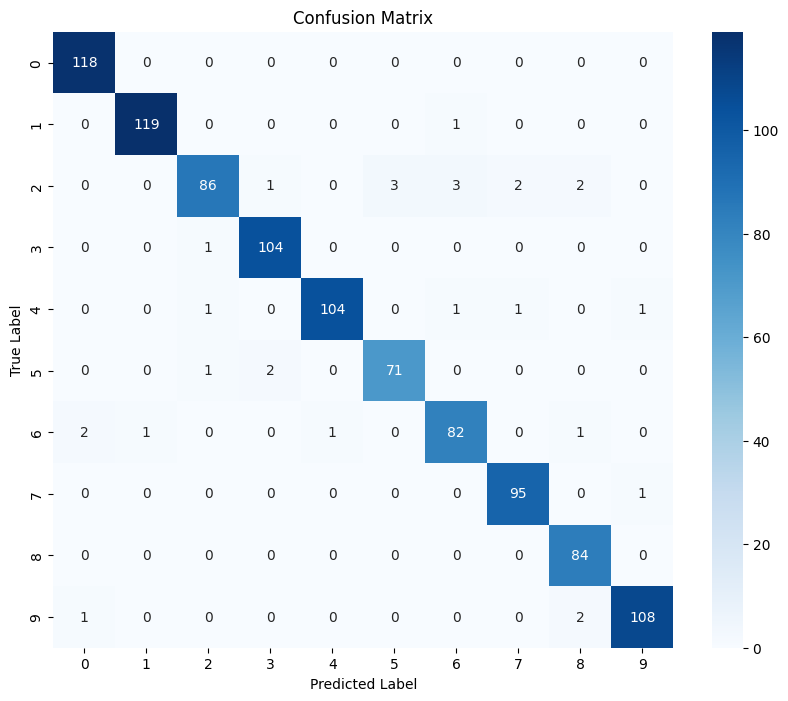


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       0.99      0.99      0.99       120
           2       0.97      0.89      0.92        97
           3       0.97      0.99      0.98       105
           4       0.99      0.96      0.98       108
           5       0.96      0.96      0.96        74
           6       0.94      0.94      0.94        87
           7       0.97      0.99      0.98        96
           8       0.94      1.00      0.97        84
           9       0.98      0.97      0.98       111

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [4]:



# Evaluate the model on the sample of test data
score = model.evaluate(test_images_resized_sample, test_labels_sample)
print(f'Test accuracy: {score[1] * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(test_images_resized_sample)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_sample, axis=1)

# Print the confusion matrix and classification report
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))


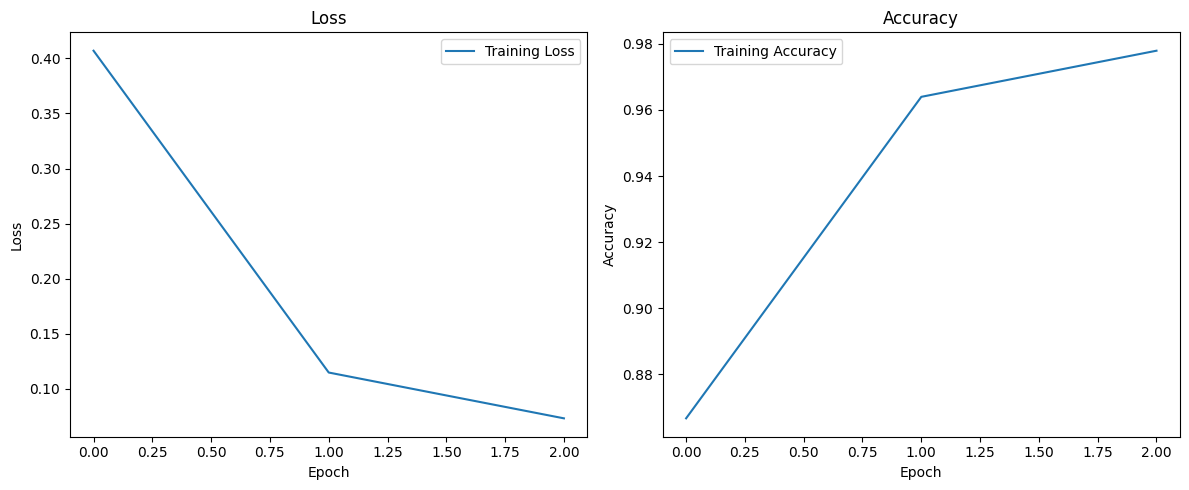

In [5]:
# Plot the training curves
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()